In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
data=pd.read_csv('loopnet_data_ca.csv')
data1=data.loc[:,['parking_ratio','size_sf','price_usd']]
data2=data
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
le = preprocessing.LabelEncoder()
le.fit(data2.building_class)
data2.building_class=le.transform(data2.building_class)

print(data.head())
print(data2.head())


   id  crawled_id    zip                                            address  \
0   1           2  90066  4077 McLaughlin Ave, Los Angeles, CA 90066 - M...   
1   2           3  90057  1801-1805 W 5th St, Los Angeles, CA 90057 - Mu...   
2   3           4  90069  1262 N Sweetzer Ave, West Hollywood, CA 90069 ...   
3   4           5  90016  4937 W 20th St, Los Angeles, CA 90016 - Multif...   
4   5           6  91101  583 Marengo Ave, Pasadena, CA 91101 - Multifam...   

          ain price_usd size_sf   sale_type no_stories property_type  ...  \
0  4233008003   3895000    8156  Investment          2   Multifamily  ...   
1          \N   2925000    7000  Investment          2   Multifamily  ...   
2  4294967295   4895000   10788  Investment          2   Multifamily  ...   
3  4294967295   3799000    8812  Investment          3   Multifamily  ...   
4  4294967295   2950000    7566  Investment          2   Multifamily  ...   

  year_renovated parking_ratio price_per_unit no_units lot_siz

In [6]:
for i in ['price_usd', 'cap_rate',  'gross_rent_multiplier'] :
    
    data2[i] = data2[i].replace('\\N', np.nan)
    data2[i] = data2[i].astype(float)
data3=data2.dropna()
data3.describe()

X1=data3.loc[:,['id','cap_rate',  'gross_rent_multiplier']]
y=data3.loc[:,'price_usd']


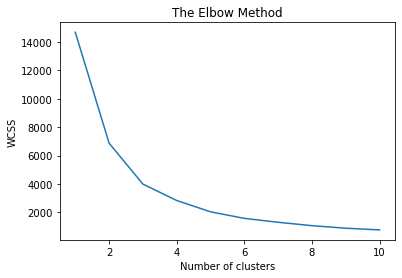

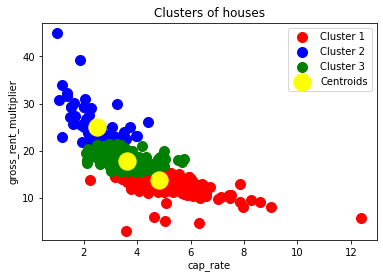

In [7]:
###Use K-means clustering to choose the preferred clustering type of houses from the original samples.
X12=X1.loc[:,['cap_rate',  'gross_rent_multiplier']]
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X12)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X12)

X13=np.array(X12)

plt.scatter(X13[y_kmeans == 0, 0], X13[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X13[y_kmeans == 1, 0], X13[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X13[y_kmeans == 2, 0], X13[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of houses')
plt.xlabel('cap_rate')
plt.ylabel('gross_rent_multiplier')
plt.legend()
plt.show()

In [20]:
X10=np.array(X1)
subset1=X10[y_kmeans == 0, :]
subset11=pd.DataFrame(subset1,columns=['id','cap_rate',  'gross_rent_multiplier'])
subset11.head(50)


,id,cap_rate,gross_rent_multiplier
0,1.0,4.88,14.35
1,2.0,5.13,14.00
2,4.0,5.31,13.90
3,6.0,4.20,14.98
4,8.0,5.02,11.31
5,9.0,4.65,13.81
6,17.0,4.06,13.75
7,18.0,4.47,14.00
8,19.0,4.61,13.25
9,21.0,3.85,15.34


In [21]:
{i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

{0: array([  0,   1,   3,   5,   7,   8,  12,  13,  14,  16,  17,  18,  19,
         20,  21,  23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  34,
         38,  44,  45,  46,  54,  56,  57,  58,  60,  61,  64,  66,  67,
         70,  71,  72,  76,  77,  78,  79,  83,  86,  92,  93,  94,  96,
         99, 100, 101, 103, 104, 105, 108, 109, 110, 111, 112, 113, 114,
        116, 118, 121, 122, 123, 125, 126, 127, 129, 133, 134, 135, 137,
        138, 145, 146, 147, 148, 150, 155, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 167, 169, 170, 177, 179, 180, 181, 182, 183, 185,
        188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 203,
        204, 205, 206, 207, 208, 211, 213, 218, 220, 222, 223, 224, 226,
        228, 229, 230, 231, 232, 236, 239, 240, 242, 243, 244, 245, 246,
        247, 251, 253, 254, 255, 259, 262, 263, 265, 266, 267, 268, 270,
        271, 272, 275, 277, 279, 280, 281, 283, 284, 285, 286, 287, 288,
        290, 291, 292, 293, 294, 295, 297, 298, 

In [10]:
regressionid=np.array(subset11.iloc[:,0])
regressionid=regressionid.tolist()

In [11]:
###use regression to select the undervalued houses:
for i in ['price_usd', 'size_sf','no_stories','year_built','no_units','lot_size_ac','building_class'] :
    
    data2[i] = data2[i].replace('\\N', np.nan)
    data2[i] = data2[i].astype(float)
regressiondata=data2.dropna()
regressiondata.describe()



,id,crawled_id,zip,price_usd,size_sf,no_stories,year_built,no_units,lot_size_ac,building_class,cap_rate,gross_rent_multiplier
count,950.000000,950.000000,950.000000,9.500000e+02,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,72745.975789,189294.076842,90447.236842,3.477846e+06,8383.612632,1.985263,1953.255789,10.056842,0.240758,2.058947,4.165916,16.097747
std,80747.660998,207868.752394,541.639862,4.502465e+06,10505.212092,0.625919,27.549569,10.645001,0.320019,0.747810,1.047438,3.592826
min,1.000000,2.000000,90002.000000,4.100000e+05,988.000000,1.000000,1800.000000,1.000000,0.030000,0.000000,1.000000,3.040000
25%,439.750000,855.750000,90029.000000,1.577500e+06,3844.250000,2.000000,1929.000000,4.000000,0.140000,2.000000,3.510000,13.850000
50%,2558.500000,6418.500000,90211.000000,2.450000e+06,5518.500000,2.000000,1956.000000,7.000000,0.170000,2.000000,4.120000,15.500000
75%,166266.750000,431397.750000,90804.000000,3.950000e+06,9282.750000,2.000000,1964.000000,11.000000,0.240000,2.000000,4.730000,17.700000
max,178715.000000,444076.000000,91803.000000,1.060000e+08,209716.000000,6.000000,2021.000000,118.000000,7.500000,4.000000,12.400000,45.000000


In [40]:
rX=regressiondata.loc[:,['size_sf','no_stories','year_built','no_units','lot_size_ac','building_class']]
ry=regressiondata.loc[:,'price_usd']

sc = StandardScaler()
rX= sc.fit_transform(rX)

array([[-0.02,  0.02,  0.39, -0.01, -0.25, -1.42],
       [-0.13,  0.02, -0.45, -0.29,  0.12, -0.08],
       [ 0.23,  0.02,  0.14,  0.09, -0.06, -0.08],
       ...,
       [-0.4 ,  0.02,  0.1 , -0.48, -0.13, -0.08],
       [ 0.69, -1.57,  0.24,  0.56,  2.09, -0.08],
       [-0.09,  0.02,  0.86, -0.01,  0.31, -0.08]])

In [35]:
###linear regression:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(rX, ry)
print(regressor.coef_)
ry_pred = regressor.predict(rX)
np.set_printoptions(precision=2)
ry=np.array(ry)
results=np.concatenate((ry_pred.reshape(len(ry_pred),1), ry.reshape(len(ry),1)),1)
results=pd.DataFrame(results,columns=['Predicted Price','Market Price'])
results['valuediscrepancy']=results['Predicted Price']-results['Market Price']
undervalued=results[results['valuediscrepancy']>0]
undervalued
score=regressor.score(rX, ry)
print(score)

[ 4.66e+06 -7.53e+02 -1.23e+04 -4.70e+05 -1.40e+05 -9.19e+04]
0.8779491794438712


In [36]:
###polynomial regression:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(rX)
regressor = LinearRegression()
regressor.fit(X_poly, ry)
print(regressor.coef_)
pry_pred = regressor.predict(X_poly)
np.set_printoptions(precision=2)
ry=np.array(ry)
presults=np.concatenate((pry_pred.reshape(len(pry_pred),1), ry.reshape(len(ry),1)),1)
presults=pd.DataFrame(presults,columns=['Predicted Price','Market Price'])
presults['valuediscrepancy']=presults['Predicted Price']-presults['Market Price']
pundervalued=presults[presults['valuediscrepancy']>0]
pundervalued
pscore=regressor.score(X_poly, ry)
print(pscore)
pundervalued=pundervalued.sort_values(by=['valuediscrepancy'],ascending=False)
pundervalued['id']=pundervalued.index+1


[ 1.39e-10  1.45e+06  2.09e+05  1.87e+05  1.41e+06  3.21e+04 -2.97e+05
 -2.78e+04  5.76e+05  5.37e+04  6.49e+04  2.87e+05 -2.13e+05  5.74e+04
 -8.43e+04 -6.43e+05 -2.70e+05 -2.64e+04  3.72e+03  2.85e+05 -1.47e+05
  6.76e+04  3.88e+04 -2.32e+05 -1.79e+05 -1.40e+03  2.61e+05  6.56e+04]
0.9324186375225938


In [38]:
###check for the chosen houses in both clustering and polynomial regression:
sameresults=subset11.merge(pundervalued, how='inner', on=None, left_on='id', right_on='id', left_index=False, right_index=False, sort=False, copy=True, indicator=False, validate=None)
sameresults=sameresults.sort_values(by=['valuediscrepancy'],ascending=False)
sameresults.head(10)
    

,id,cap_rate,gross_rent_multiplier,Predicted Price,Market Price,valuediscrepancy
75,372.0,4.16,14.50,1.042577e+07,6750000.0,3.675773e+06
71,339.0,4.84,14.80,5.487962e+06,2725000.0,2.762962e+06
36,198.0,4.37,15.00,1.271789e+07,10000000.0,2.717891e+06
131,778.0,5.92,12.00,6.371712e+06,3995000.0,2.376712e+06
35,197.0,6.30,4.73,9.564939e+06,7500000.0,2.064939e+06
54,277.0,4.40,14.90,9.553841e+06,7500000.0,2.053841e+06
28,182.0,4.48,13.22,1.200159e+07,9999000.0,2.002587e+06
3,8.0,5.02,11.31,9.489511e+06,7600000.0,1.889511e+06
121,549.0,6.41,11.84,4.487354e+06,2725000.0,1.762354e+06
15,31.0,4.93,13.50,3.279343e+06,1600000.0,1.679343e+06
